In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit
# from scipy.spatial.distance import cdist
# from scipy.stats import pearsonr
# import seaborn as sns
from math import ceil
from sklearn.decomposition import PCA, FastICA
from sklearn.cluster import KMeans

In [3]:
size = 256
n_im = 45
images = np.empty((n_im, size, size))
for i in range(n_im):
    images[i] = np.genfromtxt('ruderman/image_{}.txt'.format(1+i))
#     images[i] = np.log(images[i]) #already log-transformed
#     images[i] = images[i] - np.mean(images[i])

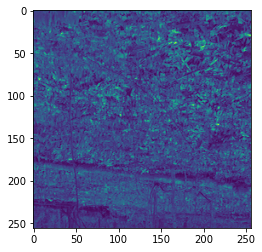

In [4]:
plt.imshow(images[10])

In [5]:
# image = images[0]

### Extract patches

In [6]:
def sample_patches(n_points, d, an_image, seed = 10):
    np.random.seed(seed)
    xs = np.random.choice(np.arange(d,size), n_points, replace = True)
    ys = np.random.choice(np.arange(d,size), n_points, replace = True)
    patches = np.empty((n_points, d*d))
    for p in range(n_points):
        patches[p] = square(xs[p], ys[p], d, an_image)
    return patches

In [7]:
def square(cx, cy, d, an_image):
    mask = np.zeros_like(an_image)
    mask[cx-d:cx, cy-d:cy] = 1
    return an_image[np.where(mask == True)]

In [8]:
n_points = 250
X = []
d = 7
for i in range(n_im):
    image = images[0]
    X.append(sample_patches(n_points, d, image))
X = np.reshape(np.array(X), (n_im*n_points, d*d))
X = X - np.mean(X, axis = 0)

In [9]:
X.shape

(11250, 49)

### A poor man's version of ICA

#### Whiten the data

In [10]:
Cov = np.cov(X.T)
# Cov = np.corrcoef(X.T)
Cov.shape

(49, 49)

In [11]:
D, V = np.linalg.eig(Cov)
mD = np.diag(D)

In [12]:
Xw = X @ V @ np.linalg.inv(np.sqrt(mD)) @ V.T

In [13]:
wCov = np.cov(Xw.T)

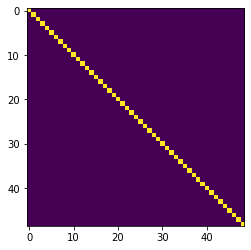

In [14]:
plt.imshow(wCov)

### K-Means clustering

In [15]:
pca = PCA(n_components=2, copy = True, random_state = 45)
Xw_2PC = pca.fit_transform(Xw)
eigenvectors = pca.components_ 

In [16]:
Xw_2PC.shape

(11250, 2)

Text(0, 0.5, 'PC2')

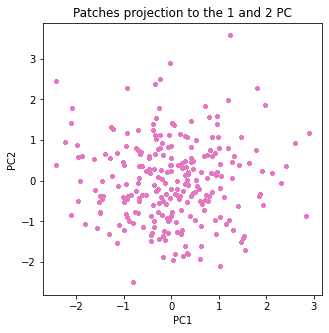

In [20]:
plt.figure(figsize = (5,5))
plt.title("Patches projection to the 1 and 2 PC")
Xw_firstPC = list(zip(*Xw_2PC))[0]
Xw_secPC = list(zip(*Xw_2PC))[1]
plt.scatter(Xw_firstPC, Xw_secPC, marker = '.', color = 'C6')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [18]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', copy_x = True, random_state = 45)
labels_2PC = kmeans.fit_predict(Xw_2PC)
# transf_spikes_2PC = kmeans.fit_transform(Xw_2PC)

Text(0, 0.5, 'PC2')

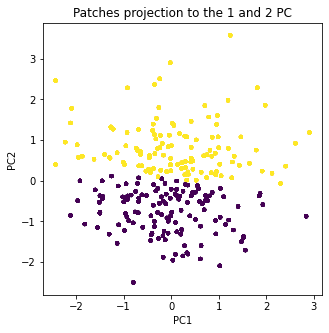

In [21]:
plt.figure(figsize = (5,5))
plt.title("Patches projection to the 1 and 2 PC")
Xw_firstPC = list(zip(*Xw_2PC))[0]
Xw_secPC = list(zip(*Xw_2PC))[1]
plt.scatter(Xw_firstPC, Xw_secPC, marker = '.', c = labels_2PC)
plt.xlabel('PC1')
plt.ylabel('PC2')